Importing Libraries and Dataset




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-white')
df = pd.read_csv('diabetes_data_upload.csv')
original = df.copy()
df.shape

(520, 17)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [4]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Hypothesis Testing

H0 : Age has no relation with the risk of diabetes
H1 : Age is related with the risk of diabetes

In [6]:
age_pos = df.loc[df['class'] == 'Positive', 'Age']
age_neg = df.loc[df['class'] == 'Negative', 'Age']
age_pos = age_pos.sample(200)
print(age_pos.shape)
print(age_neg.shape)

(200,)
(200,)


Assumptions for T-Test

Variance should be equal in both the groups
Residuals should be normally distributed

Levene's Test - To check the variance equality

In [7]:
stats.levene(age_pos, age_neg)

LeveneResult(statistic=0.6058243426368838, pvalue=0.4368268421358579)

To check whether the residuals are normally distributed

In [8]:
diff = np.array(age_pos) - np.array(age_neg)
diff

array([ -2,  19,  11,   1,  15, -29, -19, -19,  15,  19,  19,   5,  15,
        -1,  -9,   9,  15, -32,  24,  10,  19, -15,  -2,   0, -12,  39,
        31,   5, -10, -12,   4,  11,  34,  19,  -1,  21,   6, -11, -24,
        18,  -7, -35, -16,  20, -16,   5,  22,   2,  27, -11,  -7,  -9,
       -14,   3,  21,  23,  13,  -5,  -7,  -2,  -9, -29,   5,  29,   1,
        10,  -2, -11,  15, -12, -21,  -7,  15,  25,  13,   1,   5, -27,
       -12,  -8,   1,   2,  14,   8,   3,  32,  13, -17,  11,  -7, -13,
        14,  -4,  13, -12,  -3,   2,   9, -24, -11,  26,   9,   7,  13,
         8,  20,   7,  33,  19, -29,  -5,   4, -15,   4,   9,  14,  -5,
       -10, -33,  11,  41,   2,  12,  24,   3,  26,  18,  -2,  -2, -15,
         1,  -6, -10, -20,  12,   9, -10,   5,  19,  21,  -5,  14,  -8,
       -26,  -8, -11,  -9,   8,  25, -14, -10,  12,   1,  -1,  -4, -24,
         5,   4,  32,  27,  15,  19,   5,  -4, -24,  33,  45,  27, -13,
         7, -24,  55,   4, -23,  18,   5,  28,  -4, -13, -29,  2

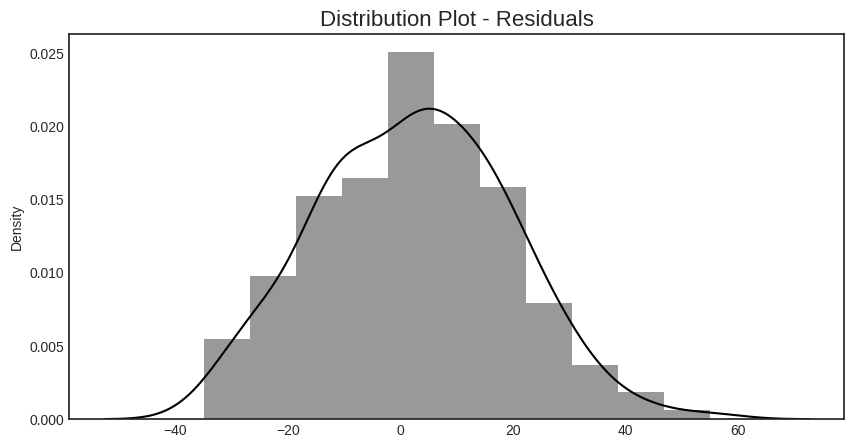

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.distplot(diff, color = 'k')

plt.title('Distribution Plot - Residuals', fontsize = 16)
plt.show()

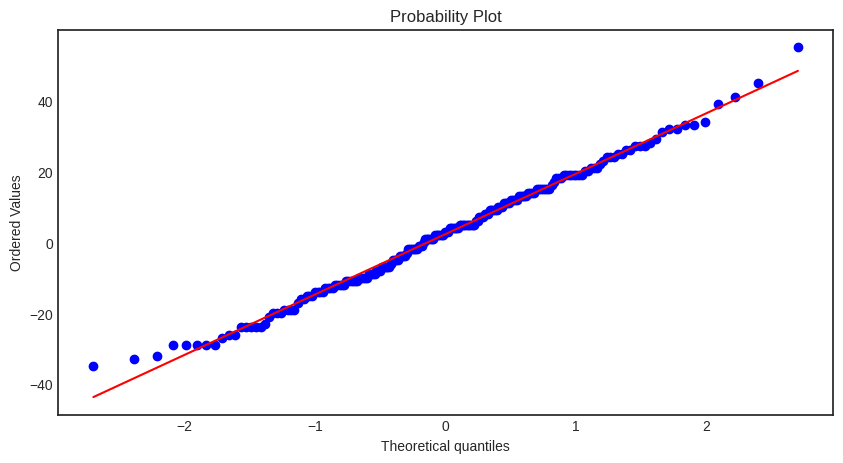

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))

stats.probplot(diff,plot = plt, dist = 'norm')
plt.show()

In [11]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9932409980631283, pvalue=0.49237101460291915)

In [12]:
stats.ttest_ind(age_pos, age_neg)

TtestResult(statistic=1.980113095354094, pvalue=0.04837913915977654, df=398.0)

The independant T-Testing confirms that the difference in mean age between positive and negative classes is significant. The null hypothesis which says the age has no relation with the diabetes risk can be rejected.

Feature Transformation

In [14]:

cat_cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
            'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

for col in cat_cols[1:-1]:
    df[col] = df[col].replace({'Yes' : 1, 'No' : 0})
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
157,48,Male,1,1,1,0,1,1,0,0,0,1,0,0,0,No,Positive
298,39,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,No,Positive
139,40,Male,1,0,0,0,0,1,0,1,0,1,0,0,1,No,Positive
179,35,Female,1,1,1,1,1,0,0,1,0,1,1,1,0,No,Positive
269,48,Female,1,1,1,1,1,0,1,1,1,1,1,1,0,No,Positive
188,70,Male,1,0,1,1,1,1,0,0,1,1,1,1,1,No,Positive
54,51,Female,0,0,0,0,0,0,1,0,0,0,1,1,0,No,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,No,Positive
276,30,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Negative
352,67,Male,1,0,0,1,1,0,1,1,1,1,0,1,1,Yes,Negative


In [15]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)
df.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,Yes,Positive,True
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,No,Positive,True
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,No,Positive,True
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,No,Positive,True
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,Yes,Positive,True


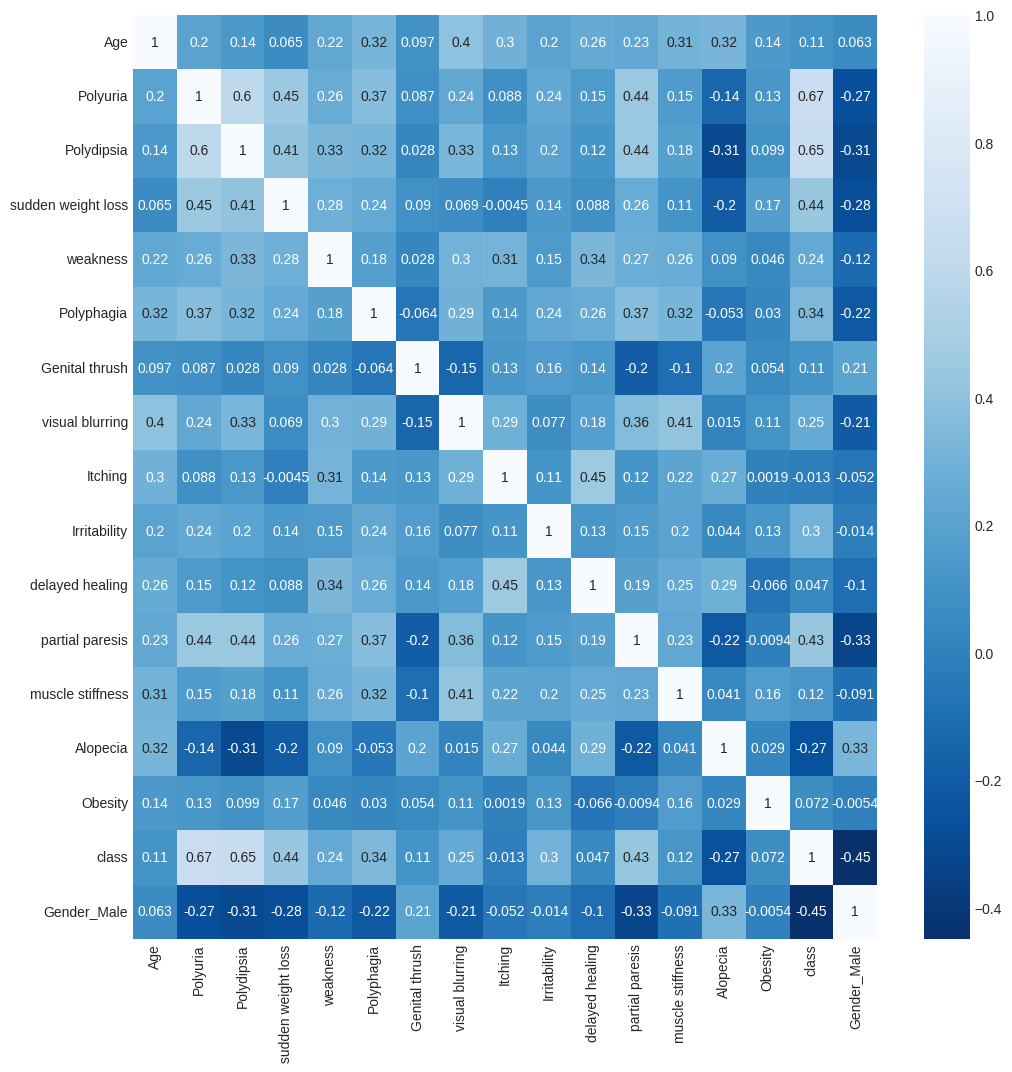

In [19]:
cat_cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
            'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

# Remove 'Gender' from the list as it's already been processed
for col in cat_cols[1:]:
    df[col] = df[col].replace({'Yes' : 1, 'No' : 0})

# This line is no longer needed as 'Gender' has already been one-hot encoded
# df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)
df['class'].replace({'Positive' : 1, 'Negative' : 0}, inplace = True)
fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.show()

In [20]:
df.corr()['class'].sort_values(ascending = False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender_Male          -0.449233
Name: class, dtype: float64

In [21]:
selected_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis', 'Gender_Male',
                 'class']
df_sel = df[selected_cols]

Predictive Modelling

Baseline Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
X = df_sel.drop('class', axis = 1)
y = df_sel['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                   random_state = 42)
lr = LogisticRegression(solver = 'liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
sv = SVC(kernel = 'linear')
acc = pd.DataFrame()
algorithm = []
training = []
testing = []
f1 = []

for i in [lr, dt, rf, knn, nb, sv]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algorithm.append(i)
    training.append(model.score(X_train, y_train))
    testing.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
acc['Model'] = algorithm
acc['Training Score'] = training
acc['Testing Score'] = testing
acc['F1 Score'] = f1
acc

,Model,Training Score,Testing Score,F1 Score
0,LogisticRegression(solver='liblinear'),0.887019,0.884615,0.906250
1,DecisionTreeClassifier(),0.894231,0.923077,0.935484
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.891827,0.961538,0.968254
3,KNeighborsClassifier(),0.894231,0.961538,0.968750
4,GaussianNB(),0.894231,0.961538,0.968750
5,SVC(kernel='linear'),0.887019,0.923077,0.939394


Voting Classifier

The models which have given out best accuracy and F1 scores are used in Voting Classifier as base estimators. The output from all the four models will be combined (based on majority) to give out the final output.

In [23]:
classifiers = (('NB', nb), ('KNN', knn), ('SVC', sv), ('DT', dt))
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = classifiers)
vc

VotingClassifier(estimators=(('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVC', SVC(kernel='linear')),
                             ('DT', DecisionTreeClassifier())))

In [25]:
classifiers = [('NB', nb), ('KNN', knn), ('SVC', sv), ('DT', dt)] # changed from tuple of tuples to list of tuples
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = classifiers)
vc

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVC', SVC(kernel='linear')),
                             ('DT', DecisionTreeClassifier())])

The accuracy and F1 score are good, but not higher than the baseline model. We'll try bagging techniques in further steps.

Bagging Classifier

In [26]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 56)
bc_class = bc.fit(X_train, y_train)
y_pred = bc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


In [27]:
bc.oob_score_

0.875

In [28]:
for i in range(100, 500, 100):
    bc = BaggingClassifier(n_estimators = i, max_features = 0.8, n_jobs = -1, random_state = 56)
    bc_class = bc.fit(X_train, y_train)
    y_pred = bc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 300
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 400
Accuracy : 0.9615384615384616
F1-Score : 0.96875


In [29]:
confusion_matrix(y_test, y_pred)

array([[38,  2],
       [ 2, 62]])

Boosting
Boosting techniques focus on giving more weightage to the misclassified entries from the previous tree in the model. Two techniques are tried out here,

AdaBoost
GradientBoosting



AdaBoost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 60)
abc_class = abc.fit(X_train, y_train)
y_pred = abc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9230769230769231
0.9393939393939394


In [31]:
for i in range(100, 600, 100):
    abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 4),
                             n_estimators = i, learning_rate = 0.1, random_state = 60)
    abc_class = abc.fit(X_train, y_train)
    y_pred = abc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 200
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419



Gradient Boosting Classifier

In [32]:
gbm = GradientBoostingClassifier(n_estimators = 200, subsample = 0.8, random_state = 62)
gbm_class = gbm.fit(X_train, y_train)
y_pred = gbm_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


In [33]:
for i in range(100, 600, 100):
    gbm = GradientBoostingClassifier(n_estimators = i, subsample = 0.8, random_state = 62)
    gbm_class = gbm.fit(X_train, y_train)
    y_pred = gbm_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419


The Gradient Boosting Classifier gives the best accuracy and F1 score of ~97%. This model correctly classifies 100 observations and misclassifies only 4 of them, as confirmed in the confusion matrix above.